In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Lufthansa/Lufthansa(SKG_LIS).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,17:30:00,21:45:00,1,5,1,1,0,110,357.98
1,15:35:00,21:15:00,1,5,1,1,0,110,361.47
2,17:30:00,14:55:00,1,5,1,1,1,110,368.56
3,15:35:00,08:10:00,1,5,1,1,1,110,374.17
4,15:35:00,22:55:00,1,5,1,1,0,220,427.47


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5627 entries, 0 to 5626
Data columns (total 9 columns):
departure_time      5627 non-null object
arrival_time        5627 non-null object
days_before         5627 non-null int64
day_of_week         5627 non-null int64
num_of_luggage      5627 non-null int64
num_of_stops        5627 non-null int64
overnight_flight    5627 non-null int64
Class               5627 non-null int64
price               5627 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 395.8+ KB


In [7]:
df.shape

(5627, 9)

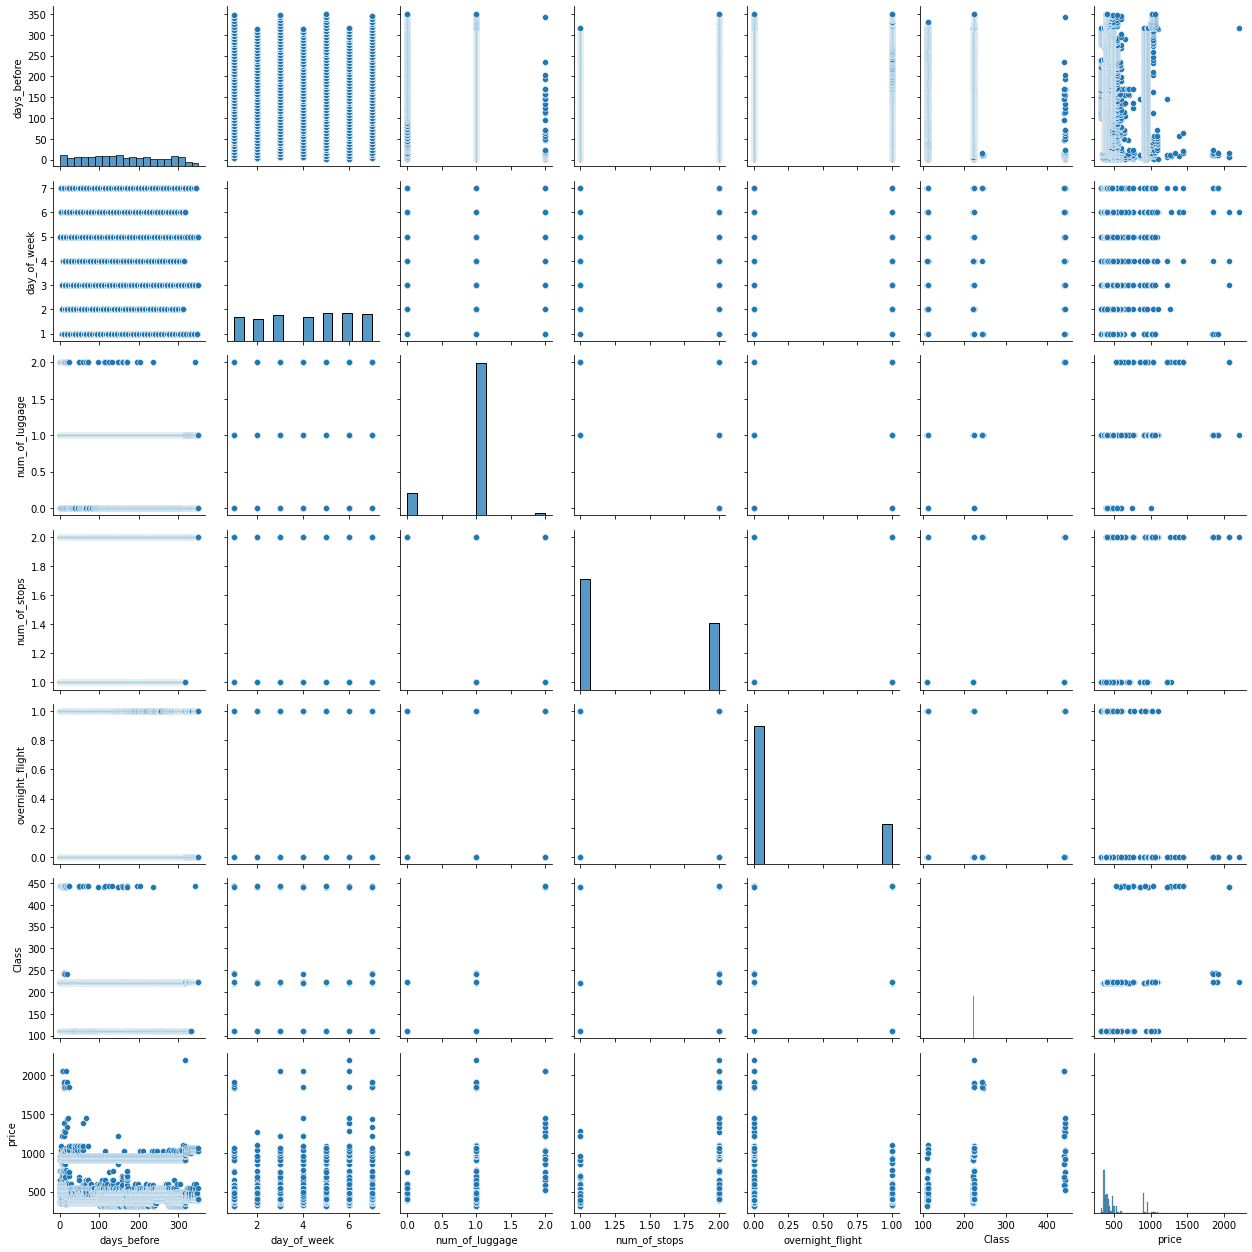

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 17:30:00,1900-01-01 21:45:00,1,5,1,1,0,110,357.98
1,1900-01-01 15:35:00,1900-01-01 21:15:00,1,5,1,1,0,110,361.47
2,1900-01-01 17:30:00,1900-01-01 14:55:00,1,5,1,1,1,110,368.56
3,1900-01-01 15:35:00,1900-01-01 08:10:00,1,5,1,1,1,110,374.17
4,1900-01-01 15:35:00,1900-01-01 22:55:00,1,5,1,1,0,220,427.47


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 17:30:00,1900-01-01 21:45:00,1,5,1,1,0,110,357.98,-2208925800000000000,-2208910500000000000
1,1900-01-01 15:35:00,1900-01-01 21:15:00,1,5,1,1,0,110,361.47,-2208932700000000000,-2208912300000000000
2,1900-01-01 17:30:00,1900-01-01 14:55:00,1,5,1,1,1,110,368.56,-2208925800000000000,-2208935100000000000
3,1900-01-01 15:35:00,1900-01-01 08:10:00,1,5,1,1,1,110,374.17,-2208932700000000000,-2208959400000000000
4,1900-01-01 15:35:00,1900-01-01 22:55:00,1,5,1,1,0,220,427.47,-2208932700000000000,-2208906300000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,5,1,1,1,0,110,357.98
1,5,1,1,1,0,110,361.47
2,5,1,1,1,1,110,368.56
3,5,1,1,1,1,110,374.17
4,5,1,1,1,0,220,427.47


In [21]:
df.to_csv('skg_lis_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [3]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.25880077130081713


In [4]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.4878139218701455


In [5]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.4863207274951231


In [6]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    
}

dtr = DecisionTreeRegressor(random_state=0)

grid_tree = GridSearchCV(estimator=dtr, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1,)
                           
grid_tree.fit(X_train,y_train)

y_pred = grid_tree.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Accuracy score of the predictions: 0.457032225897114


In [7]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.3349390808167154


In [8]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.49134887489424717


In [9]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.11792125726913105


In [10]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.27505620276241693


In [11]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
141/141 [==============================] - 3s 4ms/step - loss: 66439.5469 - val_loss: 56437.3125
Epoch 2/200
141/141 [==============================] - 0s 3ms/step - loss: 50102.2070 - val_loss: 55636.7656
Epoch 3/200
141/141 [==============================] - 0s 3ms/step - loss: 49432.4336 - val_loss: 68969.6641
Epoch 4/200
141/141 [==============================] - 0s 3ms/step - loss: 48657.4023 - val_loss: 82498.7812
Epoch 5/200
141/141 [==============================] - 0s 3ms/step - loss: 48387.2969 - val_loss: 64788.0703
Epoch 6/200
141/141 [==============================] - 0s 3ms/step - loss: 47557.9141 - val_loss: 73508.8125
Epoch 7/200
141/141 [==============================] - 0s 3ms/step - loss: 46322.2930 - val_loss: 62364.0781
Epoch 8/200
141/141 [==============================] - 1s 4ms/step - loss: 44451.9414 - val_loss: 53788.9727
Epoch 9/200
141/141 [==============================] - 1s 4ms/step - loss: 42468.8945 - val_loss: 66603.5234
Epoch 10/200
141/14

141/141 [==============================] - 1s 4ms/step - loss: 34344.6484 - val_loss: 47958.5742
Epoch 150/200
141/141 [==============================] - 1s 4ms/step - loss: 33342.0859 - val_loss: 49214.6836
Epoch 151/200
141/141 [==============================] - 1s 4ms/step - loss: 33423.8555 - val_loss: 50132.9297
Epoch 152/200
141/141 [==============================] - 1s 4ms/step - loss: 33477.4062 - val_loss: 49222.9258
Epoch 153/200
141/141 [==============================] - 1s 4ms/step - loss: 33996.9883 - val_loss: 48278.3477
Epoch 154/200
141/141 [==============================] - 1s 4ms/step - loss: 33408.7148 - val_loss: 50033.5508
Epoch 155/200
141/141 [==============================] - 1s 4ms/step - loss: 33470.6484 - val_loss: 49493.1289
Epoch 156/200
141/141 [==============================] - 1s 4ms/step - loss: 32993.2305 - val_loss: 48122.4062
Epoch 157/200
141/141 [==============================] - 1s 4ms/step - loss: 32977.8359 - val_loss: 45074.9492
Epoch 158/200
1

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.32170485340424526


In [12]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
141/141 [==============================] - 1s 5ms/step - loss: 88617.3750 - val_loss: 60210.2461
Epoch 2/200
141/141 [==============================] - 1s 4ms/step - loss: 49425.4023 - val_loss: 58263.7539
Epoch 3/200
141/141 [==============================] - 1s 4ms/step - loss: 49200.0352 - val_loss: 61468.0703
Epoch 4/200
141/141 [==============================] - 1s 4ms/step - loss: 49304.6953 - val_loss: 69766.8984
Epoch 5/200
141/141 [==============================] - 1s 4ms/step - loss: 48605.4258 - val_loss: 62410.2461
Epoch 6/200
141/141 [==============================] - 1s 4ms/step - loss: 48547.6016 - val_loss: 59656.5195
Epoch 7/200
141/141 [==============================] - 1s 4ms/step - loss: 48379.4688 - val_loss: 62181.2656
Epoch 8/200
141/141 [==============================] - 1s 4ms/step - loss: 47822.2969 - val_loss: 59046.7461
Epoch 9/200
141/141 [==============================] - 1s 4ms/step - loss: 48084.7266 - val_loss: 66074.7266
Epoch 10/200
141/14

141/141 [==============================] - 1s 4ms/step - loss: 34263.9766 - val_loss: 53794.4531
Epoch 150/200
141/141 [==============================] - 1s 4ms/step - loss: 34389.5742 - val_loss: 52095.9805
Epoch 151/200
141/141 [==============================] - 1s 4ms/step - loss: 34777.5781 - val_loss: 53979.1172
Epoch 152/200
141/141 [==============================] - 1s 4ms/step - loss: 33941.5234 - val_loss: 51459.3242
Epoch 153/200
141/141 [==============================] - 1s 4ms/step - loss: 34052.9102 - val_loss: 57407.4219
Epoch 154/200
141/141 [==============================] - 1s 4ms/step - loss: 33985.6914 - val_loss: 44592.9688
Epoch 155/200
141/141 [==============================] - 1s 4ms/step - loss: 33793.4648 - val_loss: 49470.2734
Epoch 156/200
141/141 [==============================] - 1s 4ms/step - loss: 34139.7773 - val_loss: 55315.8203
Epoch 157/200
141/141 [==============================] - 1s 4ms/step - loss: 34073.0156 - val_loss: 45594.6484
Epoch 158/200
1

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.3475338651478763


In [13]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
141/141 [==============================] - 1s 5ms/step - loss: 85405.6719 - val_loss: 63286.1602
Epoch 2/200
141/141 [==============================] - 1s 4ms/step - loss: 49483.4883 - val_loss: 58299.9375
Epoch 3/200
141/141 [==============================] - 1s 4ms/step - loss: 48910.3477 - val_loss: 66182.8516
Epoch 4/200
141/141 [==============================] - 1s 4ms/step - loss: 48694.5898 - val_loss: 55498.1016
Epoch 5/200
141/141 [==============================] - 1s 4ms/step - loss: 47779.7812 - val_loss: 67039.8047
Epoch 6/200
141/141 [==============================] - 1s 4ms/step - loss: 47827.0352 - val_loss: 56394.5352
Epoch 7/200
141/141 [==============================] - 1s 4ms/step - loss: 48222.4883 - val_loss: 66153.6953
Epoch 8/200
141/141 [==============================] - 1s 4ms/step - loss: 47551.4180 - val_loss: 72594.1172
Epoch 9/200
141/141 [==============================] - 1s 4ms/step - loss: 46095.6914 - val_loss: 64749.8750
Epoch 10/200
141/14

141/141 [==============================] - 1s 4ms/step - loss: 33784.9219 - val_loss: 49736.8867
Epoch 150/200
141/141 [==============================] - 1s 4ms/step - loss: 34106.1484 - val_loss: 54275.4375
Epoch 151/200
141/141 [==============================] - 1s 4ms/step - loss: 34267.5156 - val_loss: 53425.6406
Epoch 152/200
141/141 [==============================] - 1s 4ms/step - loss: 33767.9141 - val_loss: 53289.2266
Epoch 153/200
141/141 [==============================] - 1s 4ms/step - loss: 33835.9023 - val_loss: 50926.8438
Epoch 154/200
141/141 [==============================] - 1s 4ms/step - loss: 34115.8047 - val_loss: 50447.4883
Epoch 155/200
141/141 [==============================] - 1s 4ms/step - loss: 33763.7656 - val_loss: 51352.7734
Epoch 156/200
141/141 [==============================] - 1s 4ms/step - loss: 33799.1133 - val_loss: 50606.3906
Epoch 157/200
141/141 [==============================] - 1s 4ms/step - loss: 33743.6016 - val_loss: 50651.7539
Epoch 158/200
1

In [14]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
141/141 [==============================] - 1s 5ms/step - loss: 61584.1250 - val_loss: 63401.0312
Epoch 2/200
141/141 [==============================] - 1s 4ms/step - loss: 51340.7891 - val_loss: 55303.8398
Epoch 3/200
141/141 [==============================] - 1s 4ms/step - loss: 50628.8867 - val_loss: 62128.6055
Epoch 4/200
141/141 [==============================] - 1s 4ms/step - loss: 48807.2891 - val_loss: 54932.0312
Epoch 5/200
141/141 [==============================] - 1s 4ms/step - loss: 47389.4258 - val_loss: 62813.2148
Epoch 6/200
141/141 [==============================] - 1s 4ms/step - loss: 45750.4844 - val_loss: 70507.3438
Epoch 7/200
141/141 [==============================] - 1s 4ms/step - loss: 42609.5977 - val_loss: 56627.4414
Epoch 8/200
141/141 [==============================] - 1s 4ms/step - loss: 40915.1016 - val_loss: 73721.8984
Epoch 9/200
141/141 [==============================] - 1s 4ms/step - loss: 41009.5508 - val_loss: 52561.4297
Epoch 10/200
141/14

141/141 [==============================] - 1s 4ms/step - loss: 32969.5859 - val_loss: 59253.4688
Epoch 150/200
141/141 [==============================] - 1s 4ms/step - loss: 32910.6836 - val_loss: 45932.7305
Epoch 151/200
141/141 [==============================] - 1s 4ms/step - loss: 33095.7617 - val_loss: 64945.9414
Epoch 152/200
141/141 [==============================] - 1s 4ms/step - loss: 33206.2617 - val_loss: 70993.6094
Epoch 153/200
141/141 [==============================] - 1s 4ms/step - loss: 33143.5742 - val_loss: 102967.1328
Epoch 154/200
141/141 [==============================] - 1s 4ms/step - loss: 33122.8398 - val_loss: 45413.7969
Epoch 155/200
141/141 [==============================] - 1s 4ms/step - loss: 33396.2852 - val_loss: 52856.8516
Epoch 156/200
141/141 [==============================] - 1s 4ms/step - loss: 33293.4062 - val_loss: 50316.7656
Epoch 157/200
141/141 [==============================] - 1s 4ms/step - loss: 33390.8477 - val_loss: 47958.0195
Epoch 158/200


In [15]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
141/141 [==============================] - 1s 5ms/step - loss: 100473.2812 - val_loss: 73634.5547
Epoch 2/200
141/141 [==============================] - 1s 4ms/step - loss: 49196.8320 - val_loss: 66404.8906
Epoch 3/200
141/141 [==============================] - 1s 4ms/step - loss: 48682.8047 - val_loss: 71248.4297
Epoch 4/200
141/141 [==============================] - 1s 4ms/step - loss: 48778.9414 - val_loss: 66709.0625
Epoch 5/200
141/141 [==============================] - 1s 4ms/step - loss: 48377.9609 - val_loss: 77422.0859
Epoch 6/200
141/141 [==============================] - 1s 4ms/step - loss: 48149.5742 - val_loss: 84160.9453
Epoch 7/200
141/141 [==============================] - 1s 4ms/step - loss: 48398.8359 - val_loss: 62106.9688
Epoch 8/200
141/141 [==============================] - 1s 4ms/step - loss: 47465.5938 - val_loss: 72205.6406
Epoch 9/200
141/141 [==============================] - 1s 4ms/step - loss: 47456.9883 - val_loss: 69831.3203
Epoch 10/200
141/1

141/141 [==============================] - 1s 4ms/step - loss: 34600.0781 - val_loss: 50292.2148
Epoch 150/200
141/141 [==============================] - 1s 4ms/step - loss: 34588.0586 - val_loss: 51730.5703
Epoch 151/200
141/141 [==============================] - 1s 4ms/step - loss: 34641.3711 - val_loss: 51122.7656
Epoch 152/200
141/141 [==============================] - 1s 4ms/step - loss: 34423.3086 - val_loss: 50287.1172
Epoch 153/200
141/141 [==============================] - 1s 4ms/step - loss: 34524.9609 - val_loss: 52005.8203
Epoch 154/200
141/141 [==============================] - 1s 4ms/step - loss: 34437.2656 - val_loss: 50798.3984
Epoch 155/200
141/141 [==============================] - 1s 4ms/step - loss: 34403.1719 - val_loss: 53989.6055
Epoch 156/200
141/141 [==============================] - 1s 4ms/step - loss: 34743.0742 - val_loss: 56095.9883
Epoch 157/200
141/141 [==============================] - 1s 4ms/step - loss: 34598.4414 - val_loss: 50660.1211
Epoch 158/200
1

In [16]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
141/141 [==============================] - 1s 6ms/step - loss: 58666.1602 - val_loss: 59452.0859
Epoch 2/200
141/141 [==============================] - 1s 4ms/step - loss: 52029.7891 - val_loss: 104826.0078
Epoch 3/200
141/141 [==============================] - 1s 4ms/step - loss: 49248.3828 - val_loss: 57743.0469
Epoch 4/200
141/141 [==============================] - 1s 4ms/step - loss: 46651.1406 - val_loss: 60238.8125
Epoch 5/200
141/141 [==============================] - 1s 4ms/step - loss: 43339.8477 - val_loss: 51938.0508
Epoch 6/200
141/141 [==============================] - 1s 4ms/step - loss: 41592.7109 - val_loss: 52188.7148
Epoch 7/200
141/141 [==============================] - 1s 4ms/step - loss: 41939.6484 - val_loss: 51613.5312
Epoch 8/200
141/141 [==============================] - 1s 5ms/step - loss: 41560.7383 - val_loss: 51811.6445
Epoch 9/200
141/141 [==============================] - 1s 4ms/step - loss: 40951.7227 - val_loss: 64744.0195
Epoch 10/200
141/1

141/141 [==============================] - 1s 4ms/step - loss: 33005.6367 - val_loss: 41643.6367
Epoch 150/200
141/141 [==============================] - 1s 4ms/step - loss: 33500.7344 - val_loss: 41947.8984
Epoch 151/200
141/141 [==============================] - 1s 4ms/step - loss: 32868.3242 - val_loss: 44976.7656
Epoch 152/200
141/141 [==============================] - 1s 5ms/step - loss: 33530.0742 - val_loss: 44784.7109
Epoch 153/200
141/141 [==============================] - 1s 4ms/step - loss: 32893.8555 - val_loss: 44779.1758
Epoch 154/200
141/141 [==============================] - 1s 4ms/step - loss: 33013.2656 - val_loss: 42451.8672
Epoch 155/200
141/141 [==============================] - 1s 4ms/step - loss: 33016.8281 - val_loss: 42425.5898
Epoch 156/200
141/141 [==============================] - 1s 4ms/step - loss: 33208.4648 - val_loss: 48441.5117
Epoch 157/200
141/141 [==============================] - 1s 4ms/step - loss: 32792.8945 - val_loss: 42939.3516
Epoch 158/200
1

In [17]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [18]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [19]:
result

,ML Model,R2-Score
0,AdaBoost,0.259
1,Bagging,0.488
2,Gradient Boosting,0.486
3,Decision Tree,0.457
4,Random Forest,0.335
5,Extra Tree,0.491
6,SVR,0.118
7,MLP,0.275
8,VGG11,0.321
9,VGG13,0.347


# Graph

In [20]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

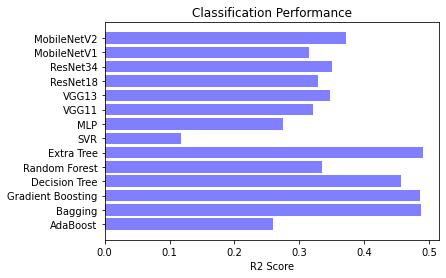

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()